# Algoritmos de optimización - Trabajo Práctico <br>
Nombre y Apellidos: David Pérez-Sevilla Pérez-Medrano  <br>
Url: https://github.com/daperezs/03MIAR---Algoritmos-de-Optimizacion.git<br>
Google Colab: https://colab.research.google.com/drive/14aRp_NerjB7YyoFQ-RuNpsv8Q7EMMCqE?usp=sharing <br>
Problema:
>1. Sesiones de doblaje <br>
>2. **Organizar los horarios de partidos de La Liga**<br>
>3. Configuración de Tribunales

Descripción del problema: <br>
Desde la La Liga de fútbol profesional se pretende organizar los horarios de los partidos de liga de cada jornada. Se conocen algunos datos que nos deben llevar a diseñar un algoritmo que realice la asignación de los partidos a los horarios de forma que maximice la audiencia.

En primer lugar se clasifican los equipos en tres categorías según el numero de seguidores( que tiene relación directa con la audiencia). Hay 3 equipos en la categoría A, 11 equipos de categoría B y 6 equipos de categoría C.

Se conoce estadísticamente la audiencia que genera cada partido según los equipos que se enfrentan y en horario de sábado a las 20h (el mejor en todos los casos).
- A vs A: 2 millones.
- A vs B: 1,3 millones.
- A vs C: 1 millon.
- B vs B: 0.9 millones.
- B vs C: 0.75 millones.
- C vs C: 0.47 millones.

Si el horario del partido no se realiza a las 20 horas del sábado se sabe que se reduce según los coeficientes de la siguiente tabla
Debemos asignar obligatoriamente siempre un partido el viernes y un partido el lunes:
- Viernes a las 20h: 0.4
- Sábado a las 12h: 0.55
- Sábado a las 16h: 0.7
- Sábado a las 18h: 0.8
- Sábado a las 20h: 1
- Domingo a las 12h: 0.45
- Domingo a las 16h: 0.75
- Domingo a las 18h: 0.85
- Domingo a las 20h: 1
- Lunes a las 20h: 0.4

Es posible la coincidencia de horarios pero en este caso la audiencia de cada partido se verá afectada y se estima que se reduce en porcentaje según la siguiente tabla dependiendo del número de coincidencias:
- 0: 0%
- 1: 25%
- 2: 45%
- 3: 60%
- 4: 70%
- 5: 75%
- 6: 78%
- 7: 80%
- 8: 80%







                                        



---



# <font color='Blue'>Modelo</font>
- ¿Como represento el espacio de soluciones?
- ¿Cual es la función objetivo?
- ¿Como implemento las restricciones?

### **Espacio de soluciones**

A la hora de representar el espacio de soluciones, visualizo en forma de matrices las posibles opciones de la audiencia, de los horarios y de las coincidencias de partidos.
Para cada situación establecemos su valor asociado.

In [ ]:
# Matriz de audiencia por partidos
partidos = {
    'A_vs_A': 2,
    'A_vs_B': 1.3,
    'A_vs_C': 1,
    'B_vs_B': 0.9,
    'B_vs_C': 0.75,
    'C_vs_C': 0.47,
}

# Matriz de horarios
horarios = {
    'V20': 0.4,
    'S12': 0.55,
    'S16': 0.7,
    'S18': 0.8,
    'S20': 1,
    'D12': 0.45,
    'D16': 0.75,
    'D18': 0.85,
    'D20': 1,
    'L20': 0.4
}

# Matriz de coincidencias
coincidencias = {
    '0': 1,     # 0%
    '1': 0.75,  # 25%
    '2': 0.55,  # 45%
    '3': 0.4,   # 60%
    '4': 0.3,   # 70%
    '5': 0.25,  # 75%
    '6': 0.22,  # 78%
    '7': 0.2,   # 80%
    '8': 0.2,   # 80%
}

### **Función objetivo**

Se establece F(x) como la función objetivo que, en este caso, queremos maximizar. Queremos obtener el máximo de audiencia posible, teniendo en cuenta que en cada partido la audiencia viene condicionada por el coeficiente del partido (según se enfrenten equipos de una categoría u otra), el horario en el que se juega el partido, y la penalización si se juegan más de un partido en el mismo horario.

Entonces, para calcular el total de la audiencia, tengo que sumar el coeficiente de audiencia obtenido en todos los partidos de acuerdo a los tres parámetros mencionados anteriormente.

La función objetivo sería la siguiente:
   

> **F(x)=∑n(partido × horario × penalización)**

Donde:

- n: es el número total de partidos.
- partido: es la audiencia de un partido.
- horario: es el coeficiente asociado al horario asignado al partido
- penalización: es el factor de penalización que se aplica en caso de coincidencia de horarios.

### **Implementación de las restricciones**

Las restricciones se implementan en el proceso de generación de la población y en la evaluación de la aptitud, la función objetivo, de cada asignación de horarios.

1. Generación de la población inicial: Cuando se genera la población inicial, se deben aplicar restricciones para garantizar que cada individuo, en nuestro caso cada asignación de horarios, cumpla con ciertas condiciones.

2. Evaluación de la aptitud: En la función objetivo, se evalúa qué tan buena es una asignación de partidos y horarios en cuáto a la audiencia. Durante esta evaluación, también se pueden aplicar restricciones adicionales. Como en nuestro caso, la coincidencia de partidos en el mismo horario.

En resumen, las restricciones se implementan tanto en la generación inicial de la población como en el cálculo de la función objetivo a cada conjunto de horaios y partidos, asegurando de esta manera que encontramos soluciones válidas y que cumplen los requisitos del problema.



---



#<font color='Blue'>Análisis</font>
- ¿Que complejidad tiene el problema?. Orden de complejidad y Contabilizar el espacio de soluciones

### **Orden de complejidad**
Para calcular el orden de complejidad del problema debemos tener en cuenta las operaciones que se realizan en el algoritmo para la obtención de la maximización de la audiencia.

En este caso, en el cual se pretende implementar un algoritmo genético para resolver el problema de asignación de horarios, el orden de complejidad se calcula considerando el número de operaciones básicas que se realizan en cada iteración del algoritmo, multiplicado por el número total de iteraciones.

Primero se generan aleatoriamente horarios para cada individuo de la población inicial. Suponiendo que hay m horarios disponibles y n partidos, generar una población asignando a cada partido un horario requerirá O($m * n$) operaciones, ya que para cada partido se debe seleccionar un horario.

Segundo se evalúa el rendimiento de cada elemento de la población en términos de audiencia. Esto requiere evaluar la audiencia a de cada partido n, lo que llevará O($a*n$) operaciones.

El último paso sería la generación de nuevas combinaciones de partidos y horarios. Por lo que el orden de complejidad sería el mismo que en el paso 1, pero multiplicado por el número de iteraciones que se realizan, es decir, O($m * n * iteraciones$).

Por lo tanto, la complejidad total del algoritmo genético sería la suma de las complejidades de las tres etapas. Teniendo en cuenta que el número de horarios es igual al número de partidos que es igual al número de audiencias, nos quedaría el siguiente resultado:


> O($m * n$) = O($n^2$)

> O($a * n$) = O($n^2$)

> O($m * n * iteraciones$) = O($iteraciones*n^2$)

Sumando los tres elementos:

> O($n^2$) + O($n^2$) + O($iteraciones*n^2$)

Obtenemos que el orden de complejidad sería:

> O($iteraciones*n^2$)



### **Contabilizar el espacio de soluciones**

Para obtener el cálculo del espacio de soluciones, debemos calcular cuántas posibles combinaciones de horarios y partidos hay.

Suponiendo que tenemos m horarios disponibles y n partidos, vemos que para cada partido hay hay m opciones de horario. La operación genérica, entendiendo que para n partidos hay m posibles horarios a asignar, sería $n ^ m$. En nuestro caso, que disponemos de 10 partidos y hay 10 posibles horarios obtenemos que el espacio de soluciones es $10^{10}$.

#<font color='Blue'>Diseño</font>
- ¿Que técnica utilizo? ¿Por qué?

### **Técnica para resolver la asignación de horarios**

En mi caso, he optado por el uso de algoritmos genéticos para resolver el problema de la asignación de partidos a los horarios. Las razones que me han llevado a elegir este método son las siguientes:
- Los algoritmos genéticos es que podemos incorporarles algunas mejoras para que tengan en cuenta cambios ante nuevas circunstancias.
- Los algoritmos genéticos son capaces de explorar un amplio espacio de soluciones de manera eficiente con problemas con múltiples variables y con varias restricciones.
- Los algoritmos genéticos tienen la capacidad de escapar de mínimos locales convergiendo así hacia soluciones más óptimas.
- Los algoritmos genéticos pueden adaptarse a cambios en el entorno o en las restricciones del problema.
- Los algoritmos genéticos se pueden aplicar en gran variedad de problemas.

### **Implementación del código**


Declaro las clases Partido y Horario. He decidido cambiar la representación del espacio de soluciones.

La clase Partido representa cada partido entre dos equipos, pasando como parámetros los dos equipos y la audiencia asociada a ese partido.

La clase Horario representa el horario correspondiente con nombre y su audiencia asociada.

In [ ]:
# Clase partido, compuesta por dos equipos y la audiencia asignada al partido
class Partido:
    def __init__(self, equipo1, equipo2, audiencia):
        self.equipo1 = equipo1
        self.equipo2 = equipo2
        self.audiencia = audiencia

    def __repr__(self):
        return f"{self.equipo1} vs {self.equipo2}: {self.audiencia} millones"

    def get_partido(self):
        return f"{self.equipo1} vs {self.equipo2}"

# Clase horario, compuesta por el horario y su coeficiente de audiencia correspondiente
class Horario:
    def __init__(self, nombre, coeficiente):
        self.nombre = nombre
        self.coeficiente = coeficiente

    def __repr__(self):
        return f"{self.nombre}: {self.coeficiente}"

    def get_horario(self):
        return self.nombre

Declaración de la función objetivo.

In [ ]:
# Declaración de la función objetivo a maximizar
class Funcion_objetivo:
    def __init__(self, asignacion_horarios, partidos):
        self.asignacion_horarios = asignacion_horarios
        self.partidos = partidos
        self.audiencia_total = 0
        self.funcion_objetivo = 0.0

    # Calcula la audiencia total teniendo en cuenta las restricciones
    def calcular_audiencia_total(self):
        if self.audiencia_total == 0:
            audiencia_total = 0
            coincidencias = {}
            for horario, partido in zip(self.asignacion_horarios, self.partidos):
                if horario in coincidencias:
                    coincidencias[horario] += 1
                else:
                    coincidencias[horario] = 1

                factor_reduccion = self.calcular_factor_reduccion(coincidencias[horario])
                audiencia_total += partido.audiencia * horario.coeficiente * factor_reduccion
            self.audiencia_total = audiencia_total
        return self.audiencia_total

    # Calcula el factor de reducción por coincidencia de horarios
    def calcular_factor_reduccion(self, coincidencias):
        if coincidencias <= 8:
            return (1 - 0.05 * coincidencias)
        else:
            return 0.2

    # Devuelve el valor
    def calcular_funcion_objetivo(self):
        if self.funcion_objetivo == 0:
            self.funcion_objetivo = self.calcular_audiencia_total()
        return self.funcion_objetivo

Funciones para la generación, evaluación y manipulación de las soluciones candidatas del problema de asignación de horarios a partidos de fútbol.

In [ ]:
import random
import operator
import numpy as np
import pandas as pd

# Función para generar una asignación de horarios inicial aleatoria
def generarAsignacionHorariosInicial(tamano_poblacion, horarios_disponibles):
    poblacion = []
    for i in range(tamano_poblacion):
        asignacion_horarios = random.sample(horarios_disponibles, len(horarios_disponibles))
        poblacion.append(asignacion_horarios)
    return poblacion

# Función para calcular el ranking de la población en función de la audiencia total
def rankingPoblacion(poblacion, partidos):
    ranking = {}
    for i, asignacion_horarios in enumerate(poblacion):
        funcion_objetivo = Funcion_objetivo(asignacion_horarios, partidos).calcular_funcion_objetivo()
        ranking[i] = funcion_objetivo
    return sorted(ranking.items(), key=operator.itemgetter(1), reverse=True)

# Función para seleccionar individuos
def seleccion(ranking, elite_size):
    seleccionados = []
    df = pd.DataFrame(np.array(ranking), columns=["Indice", "Funcion_objetivo"])
    df['Suma_acumulada'] = df.Funcion_objetivo.cumsum()
    df['Porcentaje_acumulado'] = 100 * df.Suma_acumulada / df.Funcion_objetivo.sum()

    for i in range(elite_size):
        seleccionados.append(ranking[i][0])
    for i in range(len(ranking) - elite_size):
        seleccion = 100 * random.random()
        for j in range(len(ranking)):
            if seleccion <= df.iat[j, 3]:
                seleccionados.append(ranking[j][0])
                break
    return seleccionados

# Función para crear la población
def piscinaReproduccion(poblacion, seleccionados):
    piscina = []
    for i in seleccionados:
        piscina.append(poblacion[i])
    return piscina

# Función para realizar el cruzamiento
def cruzamiento(padre1, padre2):
    punto_cruzamiento = random.randint(0, len(padre1))
    hijo = padre1[:punto_cruzamiento] + padre2[punto_cruzamiento:]
    return hijo

# Función para realizar el cruzamiento en toda la población
def cruzamientoPoblacion(piscina, elite_size):
    descendencia = []
    longitud = len(piscina) - elite_size
    pool = random.sample(piscina, len(piscina))

    for i in range(elite_size):
        descendencia.append(piscina[i])

    for i in range(longitud):
        hijo = cruzamiento(pool[i], pool[len(piscina) - i - 1])
        descendencia.append(hijo)
    return descendencia

# Función para mutar un individuo con una cierta tasa de mutación
def mutacion(individuo, tasa_mutacion):
    for swapped in range(len(individuo)):
        if(random.random() < tasa_mutacion):
            swapWith = int(random.random() * len(individuo))
            city1 = individuo[swapped]
            city2 = individuo[swapWith]
            individuo[swapped] = city2
            individuo[swapWith] = city1
    return individuo


# Función para mutar toda la población
def mutacionPoblacion(poblacion, tasa_mutacion):
    poblacion_mutada = []
    for ind in range(len(poblacion)):
        individuo_mutado = mutacion(poblacion[ind], tasa_mutacion)
        poblacion_mutada.append(individuo_mutado)
    return poblacion_mutada

# Función para generar la siguiente generación de la población
def siguienteGeneracion(poblacion_actual, elite_size, tasa_mutacion, partidos):
    ranking = rankingPoblacion(poblacion_actual, partidos)
    seleccionados = seleccion(ranking, elite_size)
    piscina = piscinaReproduccion(poblacion_actual, seleccionados)
    descendencia = cruzamientoPoblacion(piscina, elite_size)
    siguiente_generacion = mutacionPoblacion(descendencia, tasa_mutacion)
    return siguiente_generacion


Implementación del algoritmo genético.

In [ ]:
import matplotlib.pyplot as plt

def algoritmoGenetico(populacion, tamano_poblacion, tamano_elite, tasa_mutacion, generaciones, partidos):
    poblacion_actual = generarAsignacionHorariosInicial(tamano_poblacion, populacion)
    progreso = [Funcion_objetivo(poblacion_actual[0], partidos).calcular_funcion_objetivo()]
    valores = []
    text = ""
    for i in range(0, len(poblacion_actual[0] )):
      text = text + poblacion_actual[0][i].get_horario() + ", " + partidos[i].get_partido() + "\n"
    valores.append(text)

    for i in range(1, generaciones + 1):
        poblacion_actual = siguienteGeneracion(poblacion_actual, tamano_elite, tasa_mutacion, partidos)
        progreso.append(Funcion_objetivo(poblacion_actual[0], partidos).calcular_funcion_objetivo())
        text = ""
        for i in range(0, len(poblacion_actual[0] )):
          text = text + poblacion_actual[0][i].get_horario() + ", " + partidos[i].get_partido() + "\n"
        valores.append(text)

    maximo = 0
    for i in range(len(progreso)):
        if(progreso[i] > maximo):
          maximo = progreso[i]
          valores_maximo = valores[i]

    print("Audiencia máxima: ", maximo)
    print(valores_maximo)

    mejor_indice = rankingPoblacion(poblacion_actual, partidos)[0][0]
    mejor_asignacion_horarios = poblacion_actual[mejor_indice]

    plt.plot(progreso)
    plt.ylabel('Audiencia')
    plt.xlabel('Generación')
    plt.title('Mejor Audiencia vs Generación')
    plt.tight_layout()
    plt.show()

    return mejor_asignacion_horarios

Muestra de resultados.

Audiencia máxima:  6.752599999999998
Sábado 20h, EquipoA vs EquipoA
Domingo 20h, EquipoA vs EquipoB
Domingo 16h, EquipoB vs EquipoB
Sábado 18h, EquipoB vs EquipoB
Domingo 18h, EquipoB vs EquipoB
Sábado 16h, EquipoB vs EquipoB
Lunes 20h, EquipoB vs EquipoB
Domingo 12h, EquipoC vs EquipoC
Sábado 12h, EquipoC vs EquipoC
Viernes 20h, EquipoC vs EquipoC



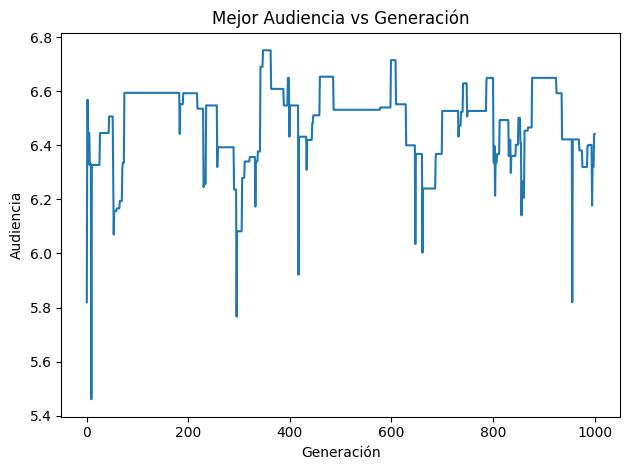

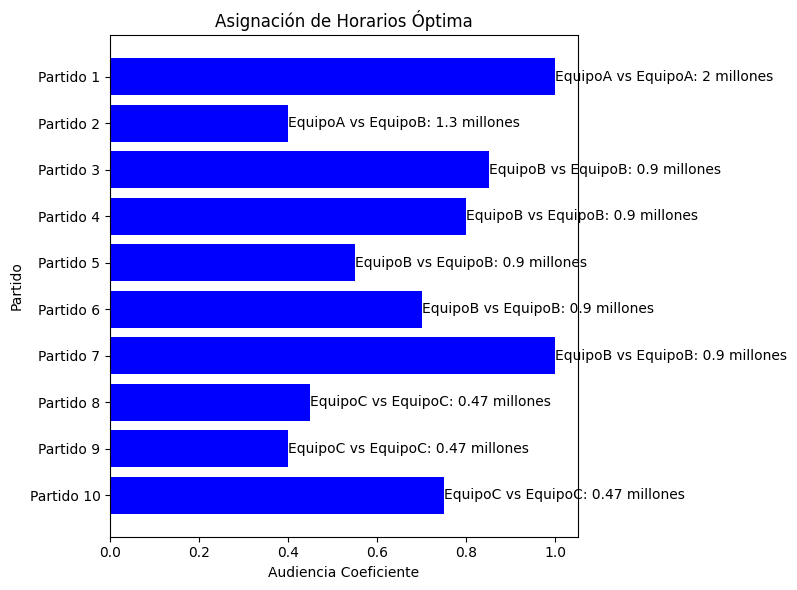

In [ ]:
# Aquí creamos una lista de esos objetos de Partido
partidos = [
    Partido(equipo1='EquipoA', equipo2='EquipoA', audiencia=2),
    Partido(equipo1='EquipoA', equipo2='EquipoB', audiencia=1.3),
    Partido(equipo1='EquipoB', equipo2='EquipoB', audiencia=0.9),
    Partido(equipo1='EquipoB', equipo2='EquipoB', audiencia=0.9),
    Partido(equipo1='EquipoB', equipo2='EquipoB', audiencia=0.9),
    Partido(equipo1='EquipoB', equipo2='EquipoB', audiencia=0.9),
    Partido(equipo1='EquipoB', equipo2='EquipoB', audiencia=0.9),
    Partido(equipo1='EquipoC', equipo2='EquipoC', audiencia=0.47),
    Partido(equipo1='EquipoC', equipo2='EquipoC', audiencia=0.47),
    Partido(equipo1='EquipoC', equipo2='EquipoC', audiencia=0.47)
]

# Crear una lista de horarios disponibles
horarios_disponibles = []

# Añadir horarios disponibles a la lista
horarios_disponibles.append(Horario(nombre="Viernes 20h", coeficiente=0.4))
horarios_disponibles.append(Horario(nombre="Sábado 12h", coeficiente=0.55))
horarios_disponibles.append(Horario(nombre="Sábado 16h", coeficiente=0.7))
horarios_disponibles.append(Horario(nombre="Sábado 18h", coeficiente=0.8))
horarios_disponibles.append(Horario(nombre="Sábado 20h", coeficiente=1))
horarios_disponibles.append(Horario(nombre="Domingo 12h", coeficiente=0.45))
horarios_disponibles.append(Horario(nombre="Domingo 16h", coeficiente=0.75))
horarios_disponibles.append(Horario(nombre="Domingo 18h", coeficiente=0.85))
horarios_disponibles.append(Horario(nombre="Domingo 20h", coeficiente=1))
horarios_disponibles.append(Horario(nombre="Lunes 20h", coeficiente=0.4))

# Ejecutar el algoritmo genético
mejor_asignacion_horarios = algoritmoGenetico(populacion=horarios_disponibles,
                                              tamano_poblacion=10,
                                              tamano_elite=10,
                                              tasa_mutacion=0.01,
                                              generaciones=1000,
                                              partidos=partidos)

# Graficar la asignación de horarios
plt.figure(figsize=(8, 6))
for i, horario in enumerate(mejor_asignacion_horarios):
    plt.barh(i, horario.coeficiente, color='blue')
    partido = partidos[i]
    plt.text(horario.coeficiente, i, f'{partido.equipo1} vs {partido.equipo2}: {partido.audiencia} millones', ha='left', va='center')

plt.xlabel('Audiencia Coeficiente')
plt.ylabel('Partido')
plt.title('Asignación de Horarios Óptima')
plt.yticks(range(len(mejor_asignacion_horarios)), ['Partido ' + str(i+1) for i in range(len(mejor_asignacion_horarios))])
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()